In [73]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import datetime

In [ ]:
def prepare_data(file):
    df = pd.read_csv(
        file, 
        parse_dates=True,  
        index_col="datetime", 
        sep=","
    )
    df.index = [df.index.date, df.index.time]
    df = df.rename_axis(['date', 'time'])
    df.fillna(False, inplace=True)
    return df

base_title = "группа ВМКтв"
df = prepare_data("unique_online_group_log.csv")    

df

In [151]:
# df.info()
count_all_users = len(df.columns)
were_online = [i for i in list(df.columns.values) if df[i].value_counts().get(True)]
count_were_online = len(were_online)

analyzed_dates = df.index.get_level_values('date').unique()[1:-1]
counters_bytime = df.apply(np.sum,axis=1)

interpolated_data = counters_bytime.rolling(window=30, center=True).mean()
interpolated_data = interpolated_data.unstack().transpose().interpolate(limit_direction = 'both')[analyzed_dates]

transposed_data = counters_bytime.unstack().transpose().interpolate(limit_direction = 'both')[analyzed_dates]
interpolated_data_mean = transposed_data.mean(axis=1).rolling(window=30, center=True).mean()
max_online = transposed_data.max().round().astype(np.integer) 

interpolated_data_mean_int = transposed_data.mean(axis=1)
interpolated_data_mean_int.index = pd.to_datetime(transposed_data.index,format='%H:%M:%S')
interpolated_data_mean_int = interpolated_data_mean_int.groupby(pd.Grouper(level="time", freq="30min")).mean().round().astype(np.integer) 


In [158]:
interpolated_data_mean_int[datetime.time(3,30,0)][0]

3

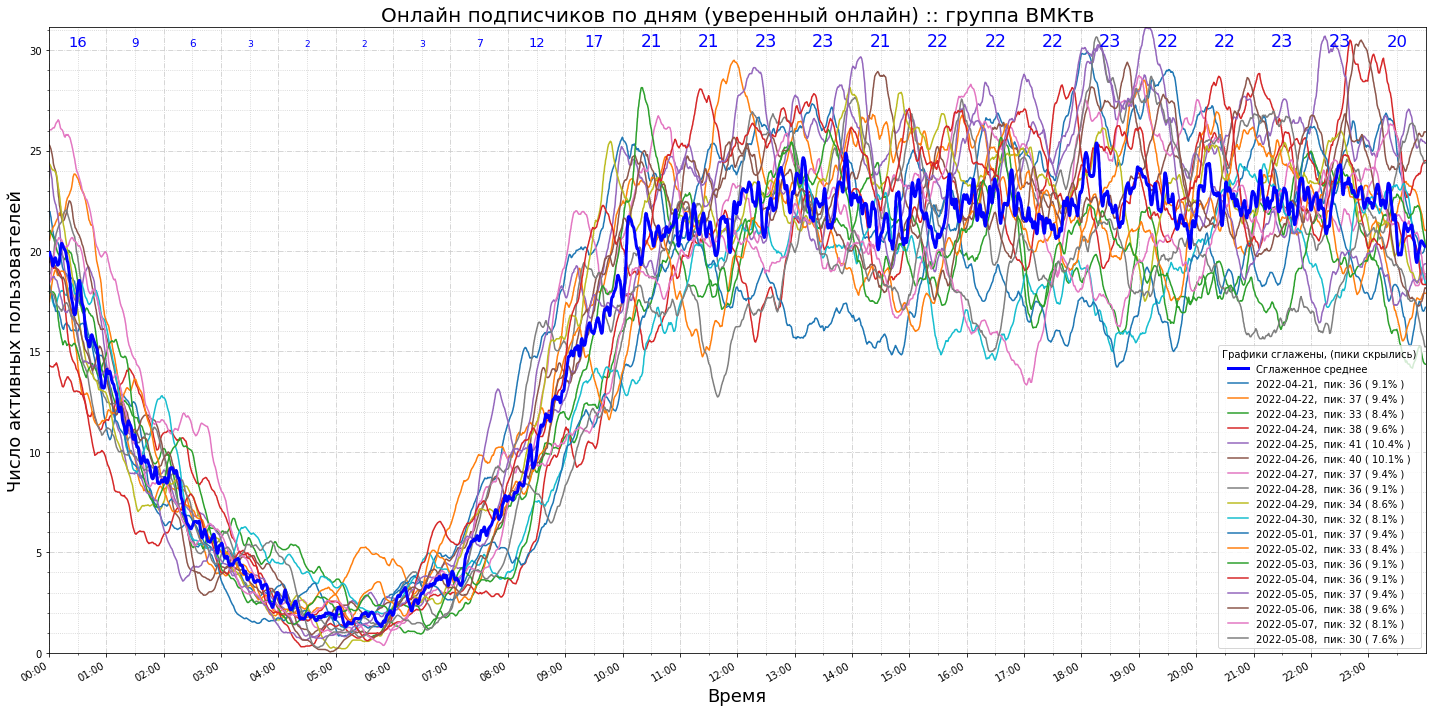

In [165]:
def all_one_plot(ax, a_df):
    ax = a_df.plot(ax=ax, legend="date", grid=True)
    ax.figure.autofmt_xdate()

    ax.set_xlabel("Время", fontsize=18)
    ax.set_ylabel("Число активных пользователей", fontsize=18)

    ax.set_xlim(0, interpolated_data.index[-1])
    ax.set_ylim(0, interpolated_data.max().max())

    ax.xaxis.set_major_locator(MultipleLocator(3600))
    ax.yaxis.set_major_locator(MultipleLocator(5))

    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))

    ax.grid(which='major', color='#CCCCCC', linestyle='-.')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

    return ax


fig, ax = plt.subplots(figsize=(20, 10))

color = 'blue'
interpolated_data_mean.plot(ax=ax,
                            color=color,
                            zorder=len(max_online) + 1,
                            linewidth=3,
                            label='mean')

step = 24
max = interpolated_data_mean_int[0].max()
for i in range(step):
    n = interpolated_data_mean_int[datetime.time(i, 30, 0)][0]
    ax.text(i / step + 0.5 / step,
            0.97,
            f"{n}",
            color=color,
            size=8 + 8 * n / max,
            transform=ax.transAxes,
            ha='center')

ar = all_one_plot(ax, interpolated_data)

ax.legend([
    'Сглаженное среднее', *[
        f'{i[0]},  пик: {i[1]} ( {i[2]:.1%} )'
        for i in zip(max_online.index, max_online, max_online /
                     count_all_users)
    ]
],
          title='Графики сглажены, (пики скрылись)')

ax.set_title(f"Онлайн подписчиков по дням (уверенный онлайн) :: {base_title}",
             fontsize=20)

plt.tight_layout()
fig.savefig("img/смешанные графики.png", facecolor='#FFF', dpi=300)

In [ ]:
text = f"""
Всего подписчиков :: {count_all_users}
'Живых' пользователей :: {count_were_online} ( {count_were_online/count_all_users:.2%} )
Зрители ленты (в сети каждый день >10 мин) :: {'sdsdf'}

Максимальный онлайн в моменте: {max_online.min()}-{max_online.max()} ( {max_online.min()/count_all_users:.1%}-{max_online.max()/count_all_users:.1%} )

"""
print(text)

In [ ]:
2 шт - Графики по дням на одном, сглаженные с легендой
    
Средний день по дням недели (одна неделя) 7 in + 1 наложенный 7 дней или неделя и будни

1 шт - Наложение средних графиков для меня и вмктв

частота
распределение
стабильность появления

+ Пиковые моменты

Преобразовать таблицу
- Удалить тех, кто не каждый день был
- Удалить тех, кто за день суммарно был меньше 20 раз
- чтобы для каждого пользователя была определена вероятность встретить его в определённый промежуток времени 10 мин. 


